<a href="https://colab.research.google.com/github/kdambrowski/Data_science/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# @tf.function
def mse(y_true, y_pred):
  return tf.reduce_mean((y_true - y_pred)*(y_true - y_pred))

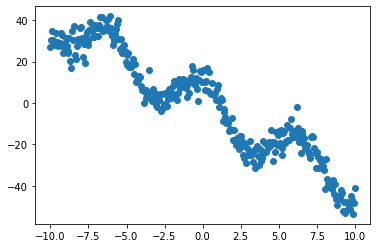

In [ ]:
N = 321

x = tf.linspace(-10,10,N)
x = tf.cast(x, tf.float32)
y = -4 * x + tf.random.normal((N, )) * 4.2 + tf.cos(x) * 10.8

plt.scatter(x.numpy(), y.numpy())

In [ ]:
W1 = tf.Variable(tf.ones((1,))*0)
W2 = tf.Variable(tf.random.normal((1,), 10,2))
b = tf.Variable(tf.ones((1,))*(0))

In [ ]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

loss_history = []
preds_history = []

for i in range(100):
  with tf.GradientTape() as tape:
    y_pred = W2 * x + b
    preds_history.append(y_pred.numpy())
    loss = mse(y, y_pred)
    loss_history.append(loss.numpy()) # detach
    

    grad = tape.gradient(loss, [W2, b])
    #print(W2, b)
    print(f'iter NO {i} loss {loss}')

    optimizer.apply_gradients(zip(grad, [W2, b]))


iter NO 0 loss 8117.083984375
iter NO 1 loss 947.8209838867188
iter NO 2 loss 171.01185607910156
iter NO 3 loss 86.83016204833984
iter NO 4 loss 77.69566345214844
iter NO 5 loss 76.6930923461914
iter NO 6 loss 76.5721435546875
iter NO 7 loss 76.54720306396484
iter NO 8 loss 76.53311920166016
iter NO 9 loss 76.52069091796875
iter NO 10 loss 76.50885009765625
iter NO 11 loss 76.49751281738281
iter NO 12 loss 76.48660278320312
iter NO 13 loss 76.47612762451172
iter NO 14 loss 76.46607208251953
iter NO 15 loss 76.45641326904297
iter NO 16 loss 76.44715118408203
iter NO 17 loss 76.438232421875
iter NO 18 loss 76.4296875
iter NO 19 loss 76.42147064208984
iter NO 20 loss 76.41358947753906
iter NO 21 loss 76.40601348876953
iter NO 22 loss 76.39873504638672
iter NO 23 loss 76.39173889160156
iter NO 24 loss 76.38501739501953
iter NO 25 loss 76.37857818603516
iter NO 26 loss 76.37239074707031
iter NO 27 loss 76.3664321899414
iter NO 28 loss 76.36072540283203
iter NO 29 loss 76.35523986816406
iter

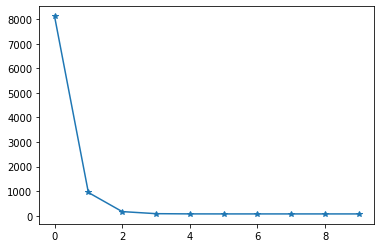

In [ ]:
plt.plot(loss_history[:10], marker='*')

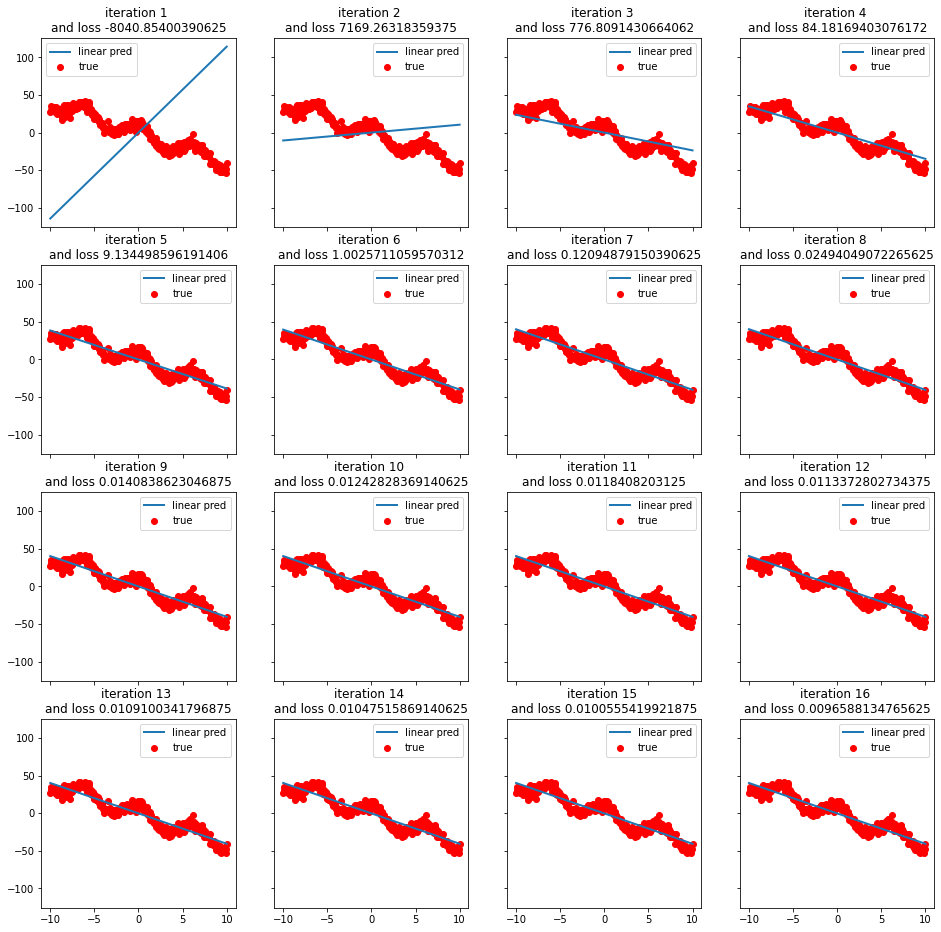

In [ ]:
fig, axes = plt.subplots(4,4 , figsize =(16,16), sharex=True, sharey=True)
for i, ax in enumerate(axes.ravel()):
  ax.plot(x, preds_history[i], label= 'linear pred', linewidth=2)
  ax.scatter(x.numpy(), y.numpy(), label='true', color='red')
  ax.set_title(f'iteration {i+1} \nand loss {loss_history[i-1]-loss_history[i]}')
  ax.legend()
